In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import lime
import lime.lime_tabular
import shap


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('../input/nslkdd/KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns
data = data.drop('level', axis=1)
data.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
125967               0       0    0  ...                  25   
125968               0       0    0  ...                 244   
125969               0       0    0  ...                  30   
125970               0       0    0  ...                   8   
125971               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
125967                    0.10                    0.06   
125968                    0.96                    0.01   
125969                    0.12                    0.06   
125970                    0.03                    0.05   
125971                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
125967                         0.00                          0.0   
125968                         0.01                          0.0   
125969                         0.00                          0.0   
125970                         0.00                          0.0   
125971                         0.30                          0.0   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
125967                  1.00                       1.0                  0.00   
125968                  0.00                       0.0                  0.00   
125969                  0.72                       0.0                  0.01   
125970                  1.00                       1.0                  0.00   
125971                  0.00                       0.0                  0.00   

        dst_host_srv_rerror_rate   attack  
125967                       0.0  neptune  
125968                       0.0   normal  
125969                       0.0   normal  
125970                       0.0  neptune  
125971                       0.0   normal  

[5 rows x 42 columns]

In [3]:
data_test=pd.read_csv('../input/nslkdd/KDDTrain+.txt')
data_test.columns = columns
data_test = data_test.drop('level', axis=1)
data_test.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
125967               0       0    0  ...                  25   
125968               0       0    0  ...                 244   
125969               0       0    0  ...                  30   
125970               0       0    0  ...                   8   
125971               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
125967                    0.10                    0.06   
125968                    0.96                    0.01   
125969                    0.12                    0.06   
125970                    0.03                    0.05   
125971                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
125967                         0.00                          0.0   
125968                         0.01                          0.0   
125969                         0.00                          0.0   
125970                         0.00                          0.0   
125971                         0.30                          0.0   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
125967                  1.00                       1.0                  0.00   
125968                  0.00                       0.0                  0.00   
125969                  0.72                       0.0                  0.01   
125970                  1.00                       1.0                  0.00   
125971                  0.00                       0.0                  0.00   

        dst_host_srv_rerror_rate   attack  
125967                       0.0  neptune  
125968                       0.0   normal  
125969                       0.0   normal  
125970                       0.0  neptune  
125971                       0.0   normal  

[5 rows x 42 columns]

In [4]:
data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:
# changing attack labels to their respective attack class
def change_label(df):
  df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [6]:
change_label(data)
data.attack.unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [7]:
data.attack.value_counts()


attack
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [8]:
print(data.isnull().values.any())

False


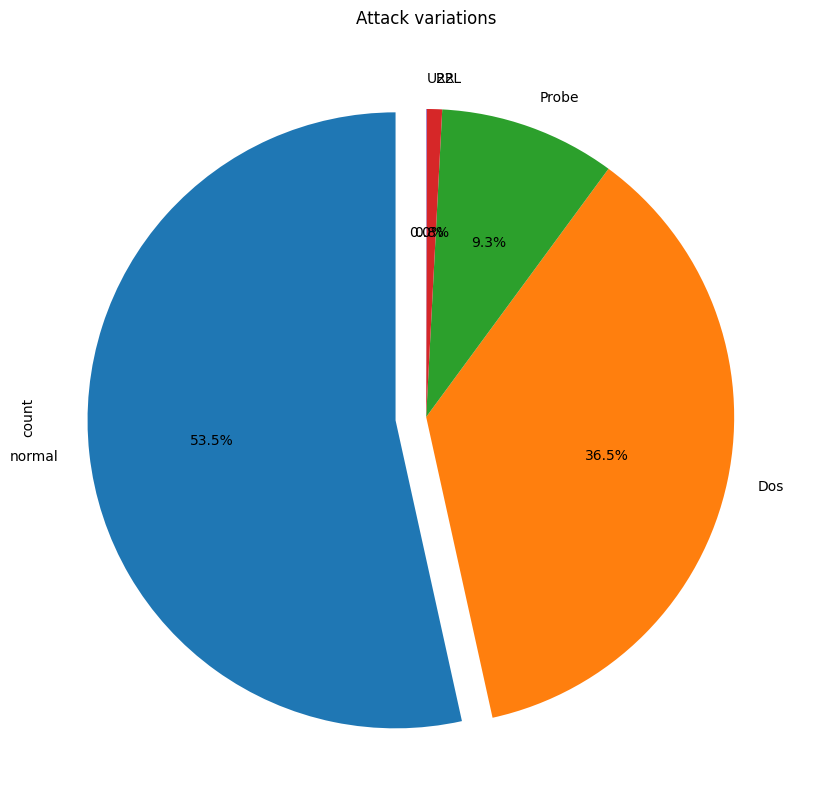

In [9]:
plt.figure(figsize = (10,10))
explode = tuple([0.1] + [0]*(len(data['attack'].unique())-1)) # set the first slice to explode
data['attack'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%')
plt.title('Attack variations')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
data.head(50)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0          0           udp       other   SF        146          0     0   
1          0           tcp     private   S0          0          0     0   
2          0           tcp        http   SF        232       8153     0   
3          0           tcp        http   SF        199        420     0   
4          0           tcp     private  REJ          0          0     0   
5          0           tcp     private   S0          0          0     0   
6          0           tcp     private   S0          0          0     0   
7          0           tcp  remote_job   S0          0          0     0   
8          0           tcp     private   S0          0          0     0   
9          0           tcp     private  REJ          0          0     0   
10         0           tcp     private   S0          0          0     0   
11         0           tcp        http   SF        287       2251     0   
12         0           tcp    ftp_data   SF        334          0     0   
13         0           tcp        name   S0          0          0     0   
14         0           tcp  netbios_ns   S0          0          0     0   
15         0           tcp        http   SF        300      13788     0   
16         0          icmp       eco_i   SF         18          0     0   
17         0           tcp        http   SF        233        616     0   
18         0           tcp        http   SF        343       1178     0   
19         0           tcp         mtp   S0          0          0     0   
20         0           tcp     private   S0          0          0     0   
21         0           tcp        http   SF        253      11905     0   
22      5607           udp       other   SF        147        105     0   
23         0           tcp         mtp   S0          0          0     0   
24       507           tcp      telnet   SF        437      14421     0   
25         0           tcp     private   S0          0          0     0   
26         0           tcp        http   SF        227       6588     0   
27         0           tcp        http   SF        215      10499     0   
28         0           tcp        http   SF        241       1400     0   
29         0          icmp       eco_i   SF          8          0     0   
30         0           tcp      finger   S0          0          0     0   
31         0           tcp        http   SF        303        555     0   
32         0           tcp     private  REJ          0          0     0   
33         0           udp    domain_u   SF         45         45     0   
34         1           udp     private   SF        105        147     0   
35         0           udp    domain_u   SF         43         43     0   
36         0           tcp      supdup   S0          0          0     0   
37         0           tcp        http   SF        324       2302     0   
38         0           tcp   uucp_path   S0          0          0     0   
39         0           tcp    ftp_data   S0          0          0     0   
40         0           tcp      Z39_50   S0          0          0     0   
41         2           tcp        smtp   SF       1591        372     0   
42      9052           udp       other   SF        146        105     0   
43         0           tcp        http   SF        290       3006     0   
44         0           tcp    csnet_ns   S0          0          0     0   
45         0           udp     private   SF         28          0     0   
46         0           tcp        http   SF        255        861     0   
47         0           tcp    ftp_data   SF        334          0     0   
48         0           tcp    ftp_data   S0          0          0     0   
49         0           tcp        http   SF        302        498     0   

    wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                0       0    0  ...                   1   
1                0       0    0  ...                  26  

In [12]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])

data['attack']=le.fit_transform(data['attack'])

data_test['protocol_type']=le.fit_transform(data_test['protocol_type'])
data_test['service']=le.fit_transform(data_test['service'])
data_test['flag']=le.fit_transform(data_test['flag'])

data_test['attack']=le.fit_transform(data_test['attack'])

In [13]:
data.head(50)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0              2       44     9        146          0     0   
1          0              1       49     5          0          0     0   
2          0              1       24     9        232       8153     0   
3          0              1       24     9        199        420     0   
4          0              1       49     1          0          0     0   
5          0              1       49     5          0          0     0   
6          0              1       49     5          0          0     0   
7          0              1       51     5          0          0     0   
8          0              1       49     5          0          0     0   
9          0              1       49     1          0          0     0   
10         0              1       49     5          0          0     0   
11         0              1       24     9        287       2251     0   
12         0              1       20     9        334          0     0   
13         0              1       36     5          0          0     0   
14         0              1       38     5          0          0     0   
15         0              1       24     9        300      13788     0   
16         0              0       14     9         18          0     0   
17         0              1       24     9        233        616     0   
18         0              1       24     9        343       1178     0   
19         0              1       35     5          0          0     0   
20         0              1       49     5          0          0     0   
21         0              1       24     9        253      11905     0   
22      5607              2       44     9        147        105     0   
23         0              1       35     5          0          0     0   
24       507              1       60     9        437      14421     0   
25         0              1       49     5          0          0     0   
26         0              1       24     9        227       6588     0   
27         0              1       24     9        215      10499     0   
28         0              1       24     9        241       1400     0   
29         0              0       14     9          8          0     0   
30         0              1       18     5          0          0     0   
31         0              1       24     9        303        555     0   
32         0              1       49     1          0          0     0   
33         0              2       12     9         45         45     0   
34         1              2       49     9        105        147     0   
35         0              2       12     9         43         43     0   
36         0              1       58     5          0          0     0   
37         0              1       24     9        324       2302     0   
38         0              1       67     5          0          0     0   
39         0              1       20     5          0          0     0   
40         0              1        2     5          0          0     0   
41         2              1       54     9       1591        372     0   
42      9052              2       44     9        146        105     0   
43         0              1       24     9        290       3006     0   
44         0              1        7     5          0          0     0   
45         0              2       49     9         28          0     0   
46         0              1       24     9        255        861     0   
47         0              1       20     9        334          0     0   
48         0              1       20     5          0          0     0   
49         0              1       24     9        302        498     0   

    wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                0       0    0  ...                   1   
1                0       0    0  ...                  26   
2                0       0    0  ...             

In [14]:
False in np.isfinite(data).values

False

In [15]:
# Statistical description of the dataset.
data.describe()

duration  protocol_type        service          flag  \
count  125972.000000  125972.000000  125972.000000  125972.00000   
mean      287.146929       1.053202      31.226558       6.97998   
std      2604.525522       0.426621      16.346504       2.68937   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       1.000000      20.000000       5.00000   
50%         0.000000       1.000000      24.000000       9.00000   
75%         0.000000       1.000000      49.000000       9.00000   
max     42908.000000       2.000000      69.000000      10.00000   

          src_bytes     dst_bytes           land  wrong_fragment  \
count  1.259720e+05  1.259720e+05  125972.000000   125972.000000   
mean   4.556710e+04  1.977927e+04       0.000198        0.022688   
std    5.870354e+06  4.021285e+06       0.014086        0.253531   
min    0.000000e+00  0.000000e+00       0.000000        0.000000   
25%    0.000000e+00  0.000000e+00       0.000000        0.000000   
50%    4.400000e+01  0.000000e+00       0.000000        0.000000   
75%    2.760000e+02  5.160000e+02       0.000000        0.000000   
max    1.379964e+09  1.309937e+09       1.000000        3.000000   

              urgent            hot  ...  dst_host_srv_count  \
count  125972.000000  125972.000000  ...       125972.000000   
mean        0.000111       0.204411  ...          115.653725   
std         0.014366       2.149977  ...          110.702886   
min         0.000000       0.000000  ...            0.000000   
25%         0.000000       0.000000  ...           10.000000   
50%         0.000000       0.000000  ...           63.000000   
75%         0.000000       0.000000  ...          255.000000   
max         3.000000      77.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate         attack  
count             125972.000000  125972.000000  
mean                   0.120241       2.247880  
std                    0.319460       1.904774  
min                    0.000000       0.000000  
25%                    0.000000       0.000000  
50%                    0.000000       4.000000  
75%                    0.000000     

In [16]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    
    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)
    
    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

In [17]:
x = data.drop(['attack'], axis=1).values
y = data['attack'].values

In [18]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [20]:
x_train.shape, x_test.shape

((100777, 41), (25195, 41))

In [21]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.8479


In [22]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  0.8405636038896607


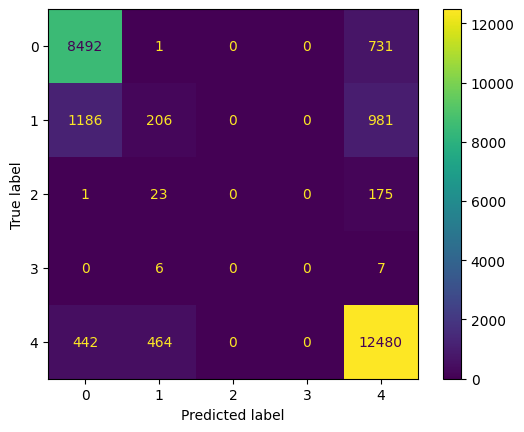

In [23]:
cm = confusion_matrix(y_testcpy, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

In [24]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the validation set: Cross Validation Score = 0.9988


In [25]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = random.predict(x_test)
print("Accuracy on test: ", accuracy_score(y_testcpy, y_pred))

Accuracy on test:  0.999047430045644


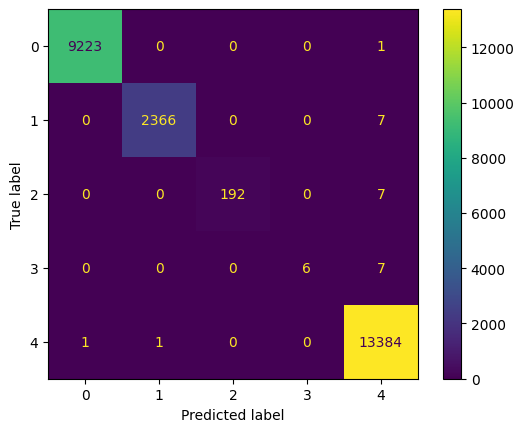

In [26]:
cm = confusion_matrix(y_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [27]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

DT=DecisionTreeClassifier()
DT_cross = fit_and_evaluate(DT, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Decision Tree Performance on the validation set: Cross Validation Score = %0.4f' % DT_cross)

Decision Tree Performance on the validation set: Cross Validation Score = 0.9975


In [28]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = DT.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  0.9978567176026989


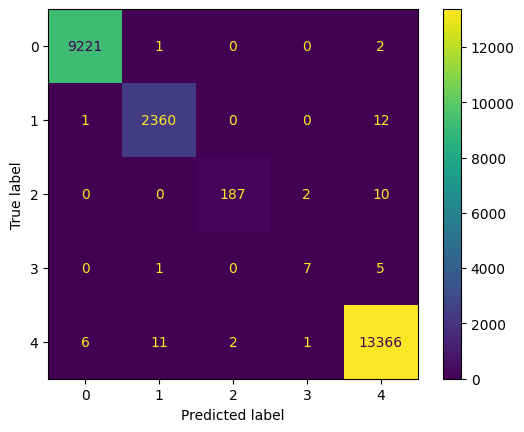

In [29]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show()

In [30]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('KNN Performance on the validation dataset: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the validation dataset: Cross Validation Score = 0.9920


In [31]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = knn.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  0.992577892438976


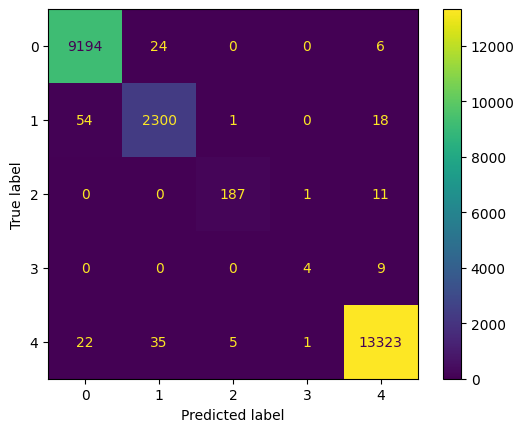

In [32]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

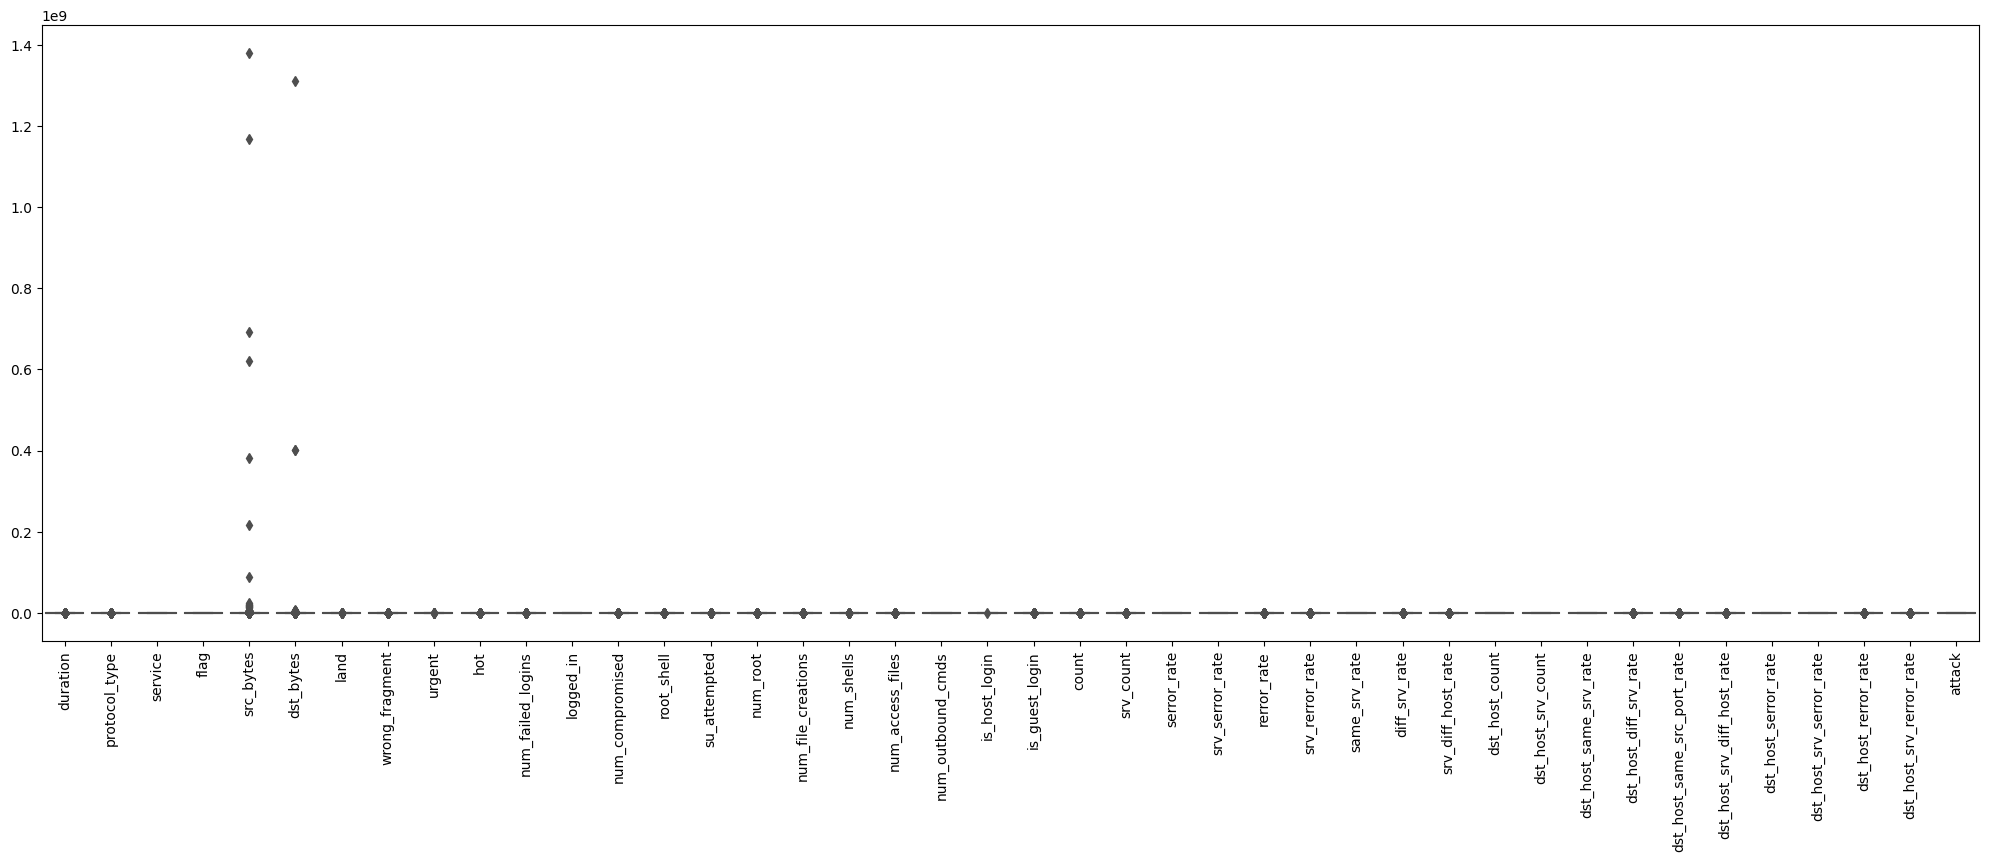

In [33]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [34]:
fig = px.box(data, y='dst_bytes')
fig.show()

In [35]:
fig = px.box(data, y='src_bytes')
fig.show()

In [36]:
data = data.drop(data[data['dst_bytes']>1500].index)
data = data.drop(data[data['src_bytes']>750].index)

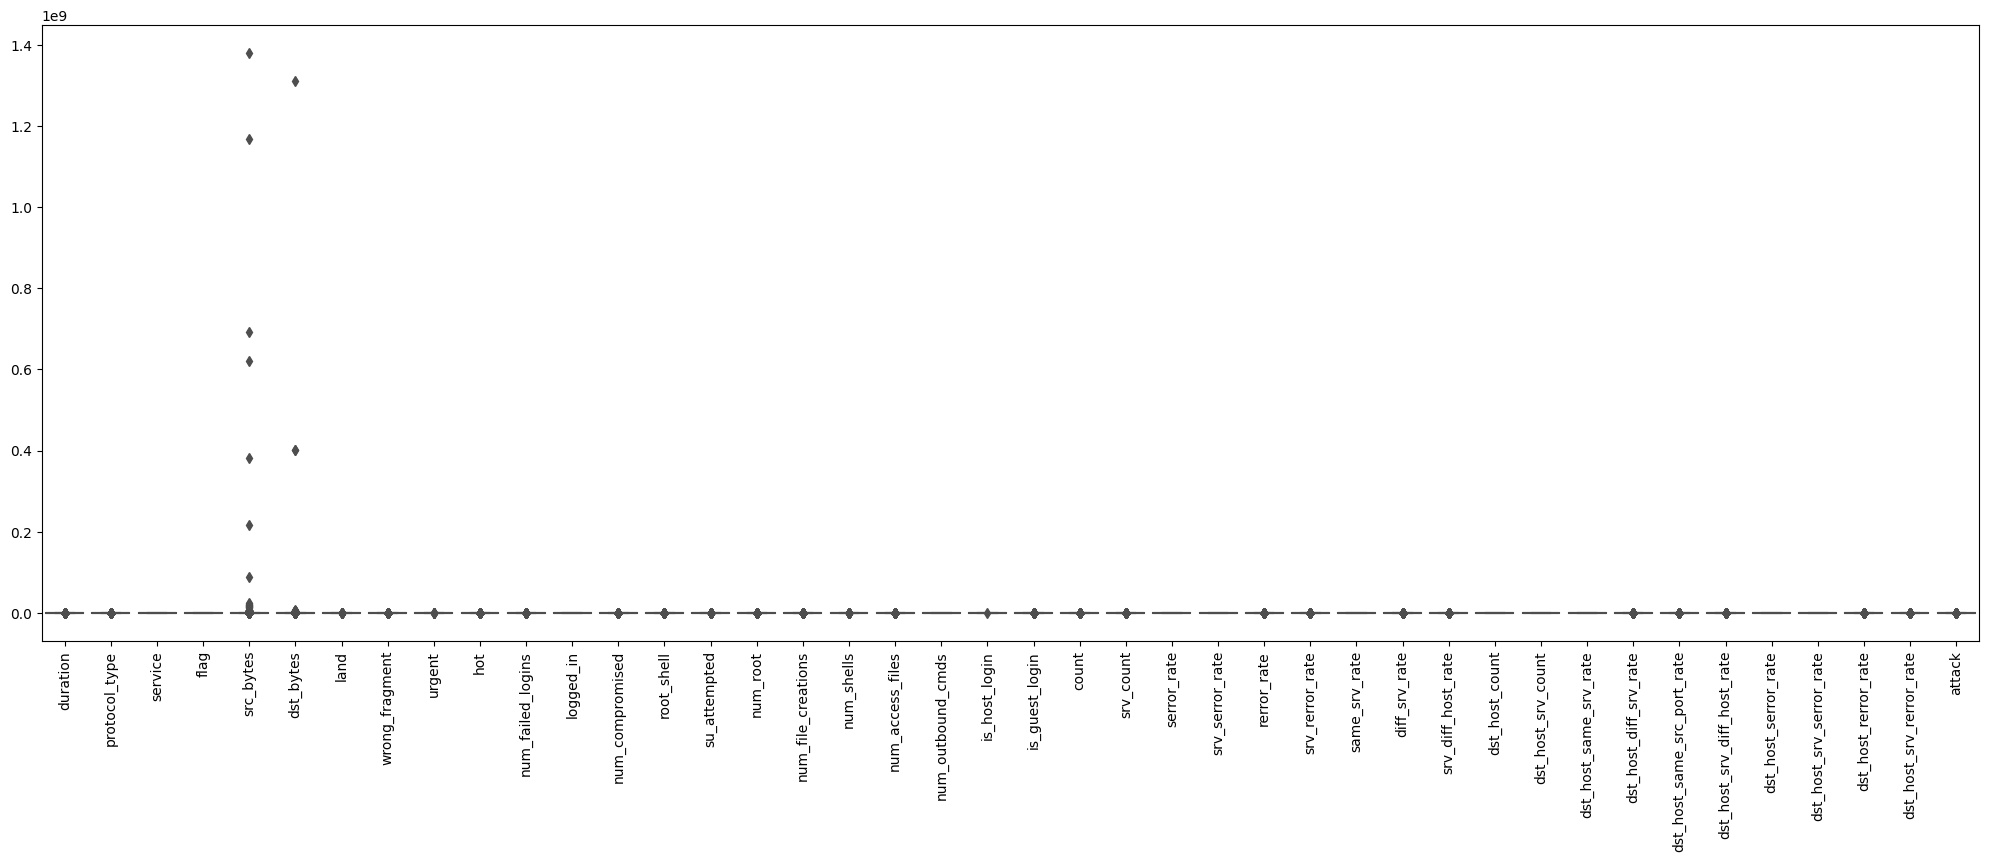

In [37]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data_test)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [38]:
fig = px.box(data_test, y='dst_bytes')
fig.show()

In [39]:
data_test = data_test.drop(data_test[data_test['dst_bytes'] >1750].index)
data_test = data_test.drop(data_test[data_test['src_bytes'] > 717].index)

In [40]:
x_wo = data.drop(['attack'], axis=1).values
y_wo = data['attack'].values

In [41]:
# scaling the dataset.
ro_scaler = RobustScaler()
x_wo_scaled = ro_scaler.fit_transform(x_wo)

scaler = MinMaxScaler()
x_wo_scaled = scaler.fit_transform(x_wo_scaled)

In [42]:
x_wo_train , x_wo_test , y_wo_train , y_wo_test = train_test_split(x_wo_scaled, y_wo, test_size= 0.2 , random_state=42)

In [43]:
x_wo_train.shape, x_wo_test.shape

((74658, 41), (18665, 41))

In [44]:
xl_wo_test = data_test.drop(['attack'], axis=1).values
yl_wo_test = data_test['attack'].values
scaler = MinMaxScaler()
xl_wo_test = scaler.fit_transform(xl_wo_test)

In [45]:
def explain_model(model, x_train, explainer_type):
    if explainer_type == 'lime':
        explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=data.drop(['attack'], axis=1).columns)
    elif explainer_type == 'shap':
        explainer = shap.KernelExplainer(model.predict, x_train)
    else:
        raise ValueError("Invalid explainer type. Choose either 'lime' or 'shap'.")
    
    return explainer

In [46]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.9842


In [47]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

logr = LogisticRegression() 
run_experiment(logr, x_traincpy , xl_testcpy , y_traincpy , yl_testcpy)

R^2 :  -11.86555867650993
MAE : 8.596461596926066
RMSE: 9.009873915759
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.33      0.01         6
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00      3598
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00     41213
          10       0.00      0.00      0.00      1493
          11       0.00      0.00      0.00     39765
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00      2918
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00      3624
          

In [48]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred_proba = logr.predict_proba(x_test)
y_pred = logr.predict(xl_testcpy)
accuracy = accuracy_score(yl_testcpy, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  8.444876071443651e-05


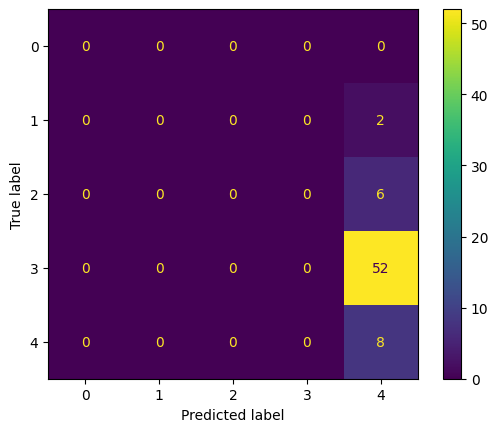

In [49]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

In [50]:
explainer_lime = explain_model(logr, x_traincpy, 'lime')
explainer_shap = explain_model(logr, x_traincpy, 'shap')

In [51]:
# Lime explanation
lime_explanation = explainer_lime.explain_instance(xl_testcpy[0], logr.predict_proba, num_features=len(data.drop(['attack'], axis=1).columns))
lime_explanation.show_in_notebook(show_table=True)

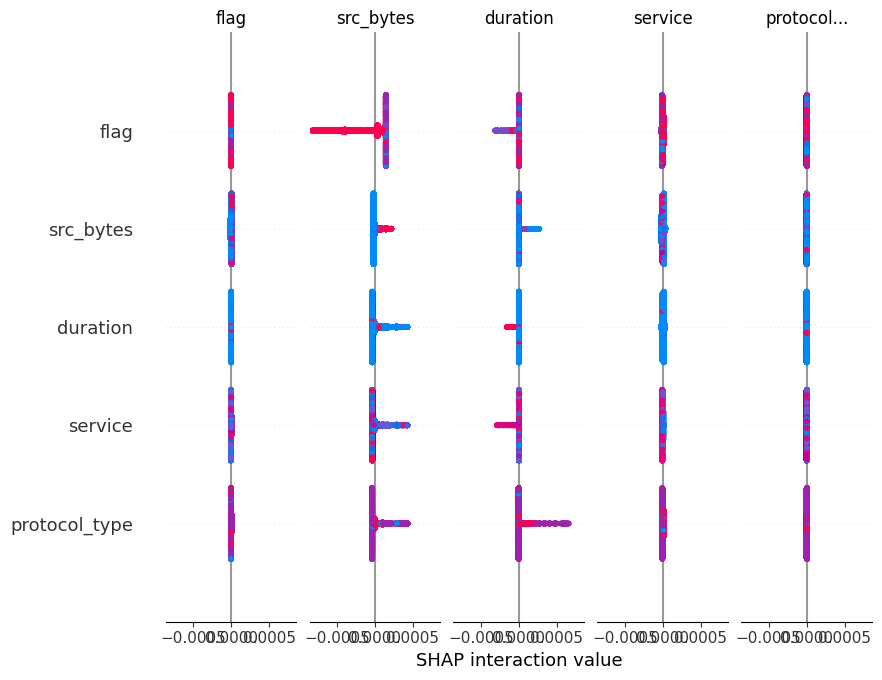

In [52]:
explainer = shap.Explainer(logr, x_traincpy)
shap_values = explainer(x_testcpy)
shap.summary_plot(shap_values, x_testcpy, feature_names=data.columns[:-1] , show=False)

# Save the plot as a file
plt.savefig('shap_lr_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Display the plot
plt.show()


In [53]:
# Save the model to a file
filename = 'logistic_regression_model.sav'
joblib.dump(logr,filename)

['logistic_regression_model.sav']

In [54]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9985


In [55]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

y_pred = random.predict(xl_testcpy)
print("Accuracy: ", accuracy_score(yl_testcpy, y_pred))

Accuracy:  6.333657053582738e-05


In [56]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.01      1.00      0.02         6
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00      3598
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00     41213
          10       0.00      0.00      0.00      1493
          11       0.00      0.00      0.00     39765
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00      2918
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00      3624
          18       0.00      0.00      0.00       647
    

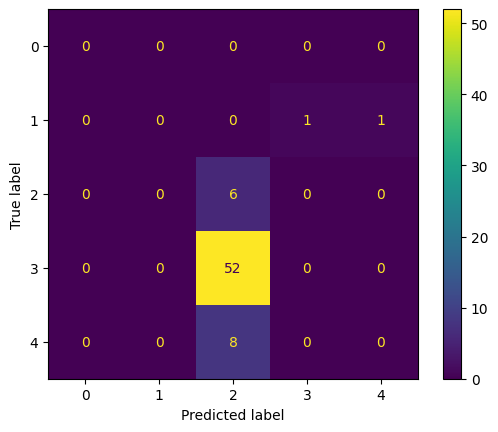

In [57]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [58]:
explainer_lime = explain_model(random, x_traincpy, 'lime')
explainer_shap = explain_model(random, x_traincpy, 'shap')

In [59]:
# Lime explanation
lime_explanation = explainer_lime.explain_instance(xl_testcpy[0], random.predict_proba, num_features=len(data.drop(['attack'], axis=1).columns))
lime_explanation.show_in_notebook(show_table=True)

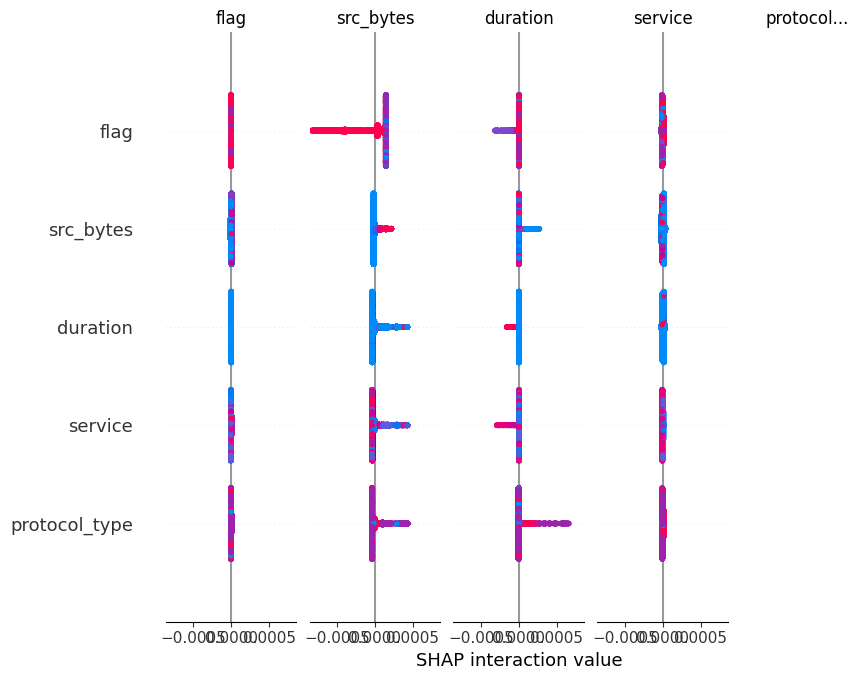

In [60]:
explainer_shap = explain_model(random, x_traincpy, 'shap')
shap.summary_plot(shap_values, x_testcpy, feature_names=data.columns[:-1] , show=False)

# Save the plot as a file
plt.savefig('shap_rf_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Display the plot
img = plt.imread('shap_rf_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [61]:
# Save the model to a file
filename = 'random_forest_model.pkl'
joblib.dump(random, filename)

['random_forest_model.pkl']

In [62]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('KNN Performance on the validation dataset: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the validation dataset: Cross Validation Score = 0.9967


In [63]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

y_pred = knn.predict(xl_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  1.0556095089304564e-05


In [64]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.17      0.00         6
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00      3598
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00     41213
          10       0.00      0.00      0.00      1493
          11       0.00      0.00      0.00     39765
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00      2918
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00      3624
          18       0.00      0.00      0.00       647
    

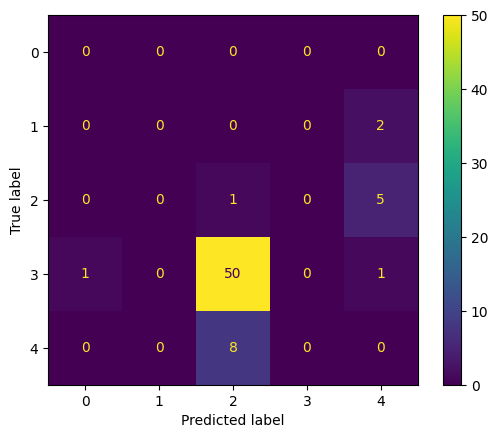

In [65]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [66]:
explainer_lime = explain_model(knn, x_traincpy, 'lime')
explainer_shap = explain_model(knn, x_traincpy, 'shap')

In [67]:
# Lime explanation
lime_explanation = explainer_lime.explain_instance(xl_testcpy[0], knn.predict_proba, num_features=len(data.drop(['attack'], axis=1).columns))
lime_explanation.show_in_notebook(show_table=True)

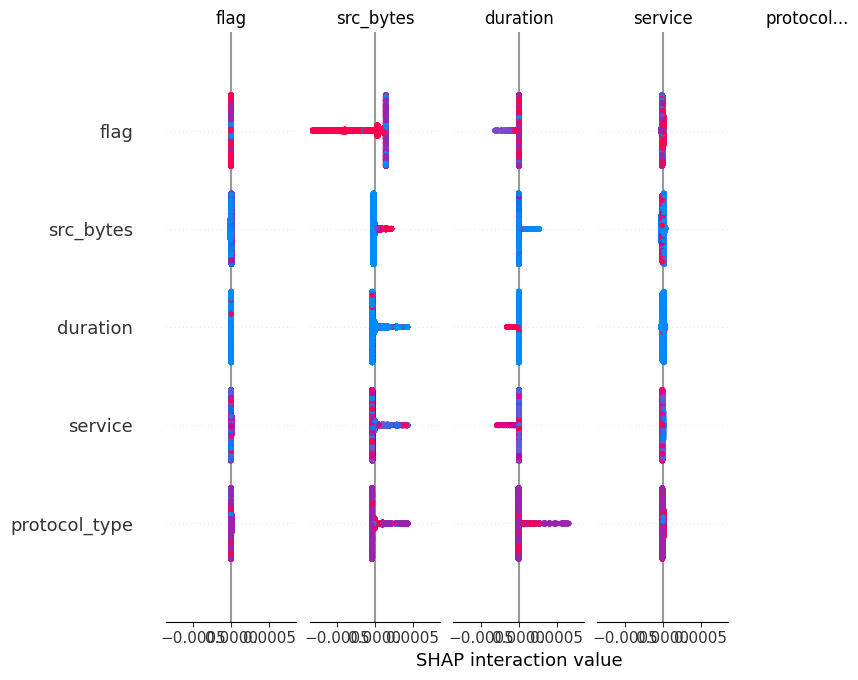

In [68]:
explainer_shap = explain_model(knn, x_traincpy, 'shap')
shap.summary_plot(shap_values, x_testcpy, feature_names=data.columns[:-1] , show=False)

# Save the plot as a file
plt.savefig('/kaggle/working/shap_knn_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Display the plot
plt.imshow(plt.imread('/kaggle/working/shap_knn_plot.png'))
plt.axis('off')
plt.show()

In [69]:
# Save the model to a file
filename = 'knn_model.pkl'
joblib.dump(knn, filename)

['knn_model.pkl']